# Filtros do Instagram, Snapchat, Tik Tok
Já parou para pensar como os filtros das redes sociais são construídos? Poucas pessoas sabem que esse é um problema de visão computacional no qual se utiliza técnicas de Aprendizado de máquina e deep learning para fazer a detecção dos pontos fiduciais (landmarks). Esses pontos são fundamentais para fazer a detecção e rastreio de regiões importantes da face como olhos, nariz e boca. Graças a esses landmarks sabemos a localização por exemplo do nariz e podemos criar uma sobreposição de um desenho em cima da nossa face (orelhas de gatinho, lingua de cão, etc.).

In [1]:
!pip3 install dlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import cv2
import numpy as np
import dlib
from math import hypot
import matplotlib.pyplot as plt


Bad key "nbagg.transparent" on line 426 in
/home/polsecai/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 509 in
/home/polsecai/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_args" on line 512 in
/home/polsecai/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution
In /home/polseca

In [2]:
# Abrindo câmera e lendo imagem do nariz para usarmos como máscara
cap = cv2.VideoCapture(0)
nose_image = cv2.imread("pig.png")
_, frame = cap.read()
rows, cols, _ = frame.shape
nose_mask = np.zeros((rows, cols), np.uint8)

# Carregando o modelo de detecção de landmarks
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

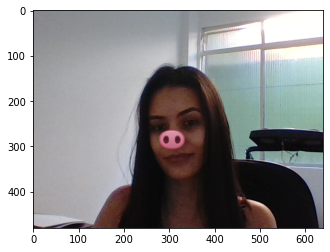

In [4]:
while True:
    _, frame = cap.read()
    nose_mask.fill(0)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(frame)
    for face in faces:
        landmarks = predictor(gray_frame, face)
        
         # landmarks na região do nariz obtidos pela Dlib
        top_nose = (landmarks.part(29).x, landmarks.part(29).y)
        center_nose = (landmarks.part(30).x, landmarks.part(30).y)
        left_nose = (landmarks.part(31).x, landmarks.part(31).y)
        right_nose = (landmarks.part(35).x, landmarks.part(35).y)

        # A largura e altura na imagem do nariz devem ser proporcional a área ocupada pelo seu nariz 
        #(utilizamos multiplicadores empíricos, modifique da forma que achar melhor)
        nose_width = int(hypot(left_nose[0] - right_nose[0],
                           left_nose[1] - right_nose[1]) * 1.9)
        nose_height = int(nose_width * 0.97)

        # Calcular o ponto de início e o fim de onde a máscara vai ocupar na imagem
        top_left = (int(center_nose[0] - nose_width / 2),
                              int(center_nose[1] - nose_height / 2))
        bottom_right = (int(center_nose[0] + nose_width / 2),
                       int(center_nose[1] + nose_height / 2))
        
        # Adicionando o nariz
        nose_pig = cv2.resize(nose_image, (nose_width, nose_height))
        nose_pig_gray = cv2.cvtColor(nose_pig, cv2.COLOR_BGR2GRAY)
        _, nose_mask = cv2.threshold(nose_pig_gray, 25, 255, cv2.THRESH_BINARY_INV)
        

        nose_area = frame[top_left[1]: top_left[1] + nose_height,
                    top_left[0]: top_left[0] + nose_width]
        nose_area_no_nose = cv2.bitwise_and(nose_area, nose_area, mask=nose_mask)
        final_nose = cv2.add(nose_area_no_nose, nose_pig)

        frame[top_left[1]: top_left[1] + nose_height,
                    top_left[0]: top_left[0] + nose_width] = final_nose

#         cv2.imshow("Nose area", nose_area)
#         cv2.imshow("Nose pig", nose_mask)
#         cv2.imshow("final nose", final_nose)



    cv2.imshow("Frame", frame)



    key = cv2.waitKey(1)
    if key == 27:
        break
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()